In [2]:
# Imports all the needed libraries
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

(1024, 1024, 3)

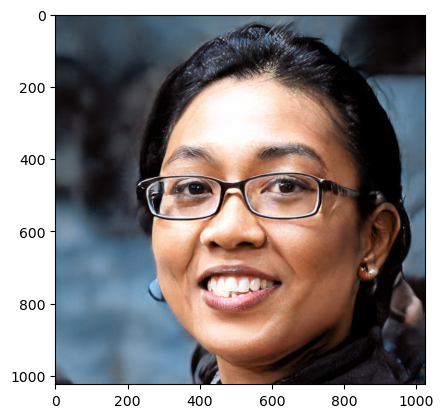

In [3]:
img = image.load_img("data/testing/face/1.jpg") # Loads an image to check if we got the directories right
plt.imshow(img) # Shows the image
cv2.imread("data/testing/face/1.jpg").shape # Shows dimensions and channels

In [4]:
cv2.imread("data/testing/face/1.jpg") # Reads and shows raw numerical data of the image

array([[[110, 102,  89],
        [104,  96,  83],
        [ 92,  81,  67],
        ...,
        [ 20,  20,  20],
        [ 31,  31,  31],
        [ 57,  58,  56]],

       [[102,  94,  81],
        [ 94,  86,  73],
        [ 88,  79,  65],
        ...,
        [ 12,  11,  13],
        [ 23,  23,  23],
        [ 41,  42,  40]],

       [[ 90,  84,  71],
        [ 85,  79,  66],
        [ 83,  75,  62],
        ...,
        [  7,   6,   8],
        [ 16,  15,  17],
        [ 28,  28,  28]],

       ...,

       [[ 53,  44,  40],
        [ 51,  42,  38],
        [ 46,  37,  33],
        ...,
        [ 18,  35,  31],
        [ 16,  30,  29],
        [ 14,  26,  30]],

       [[ 54,  47,  44],
        [ 45,  38,  35],
        [ 39,  33,  28],
        ...,
        [ 16,  29,  27],
        [ 12,  21,  25],
        [  6,  14,  21]],

       [[ 57,  49,  49],
        [ 46,  39,  36],
        [ 39,  32,  29],
        ...,
        [ 12,  23,  21],
        [  1,   7,  14],
        [  0,   0,   8]]

In [4]:
train = ImageDataGenerator(rescale = 1/255) # Converts RGB/BGR Values from 0 - 255 to 0-1
validation = ImageDataGenerator(rescale = 1/255) # Converts RGB/BGR Values from 0 - 255 to 0-1

train_set = train.flow_from_directory('data/training', target_size=(250,250), # Sets path, image size, and class mode to binary as we only have two classes
                                     batch_size = 3,
                                     class_mode = 'binary')

validation_set = train.flow_from_directory('data/validating', target_size=(250,250), # Sets path, image size, and class mode to binary as we only have two classes
                                     batch_size = 3,
                                     class_mode = 'binary')


Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [5]:
# Iniatilizes and sets up the CNN
model = Sequential() #Sequential model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)))#32 filters 3x3 , activation ReLU, input shape 250x250px 3channels 
model.add(MaxPooling2D((2, 2)))#Downsampling 2x2
model.add(Conv2D(64, (3, 3), activation='relu'))#64 filters 3x3 , activation ReLU
model.add(MaxPooling2D((2, 2)))#Downsampling 2x2
model.add(Conv2D(64, (3, 3), activation='relu'))#64 filters 3x3 , activation ReLU
model.add(Flatten())#flattening sampe into a 1d vector
model.add(Dense(64, activation='relu'))# Sets the dense to 64 neurons
model.add(Dense(1, activation='sigmoid'))

#Compiles CNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Sets the traning, what sets to use how many epochs and etc
model_fit = model.fit(train_set, steps_per_epoch = 3, epochs=30, validation_data = validation_set)




Epoch 1/30


3/3 [==============================] - 2s 326ms/step - loss: 7.5128 - accuracy: 0.6250 - val_loss: 2.1504 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 1s 231ms/step - loss: 1.4627 - accuracy: 0.6250 - val_loss: 4.0039 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 1s 210ms/step - loss: 1.3593 - accuracy: 0.5000 - val_loss: 0.7322 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 1s 208ms/step - loss: 0.4488 - accuracy: 0.8889 - val_loss: 0.7480 - val_accuracy: 0.6000
Epoch 5/30
3/3 [==============================] - 1s 220ms/step - loss: 0.1747 - accuracy: 1.0000 - val_loss: 1.3483 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 1s 221ms/step - loss: 0.0594 - accuracy: 1.0000 - val_loss: 2.6835 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 1s 214ms/step - loss: 8.2689e-05 - accuracy: 1.0000 - val_loss: 4.1607 - val_accuracy: 0.4500
Epoch 8/30


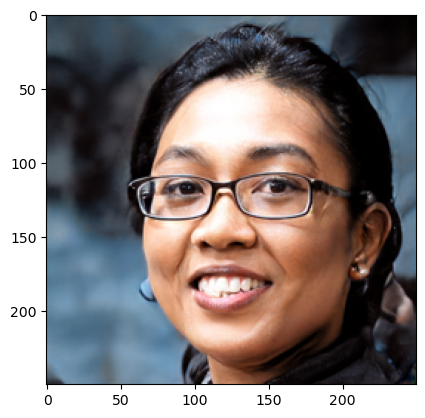

1/1 [==============================] - 0s 111ms/step
Face


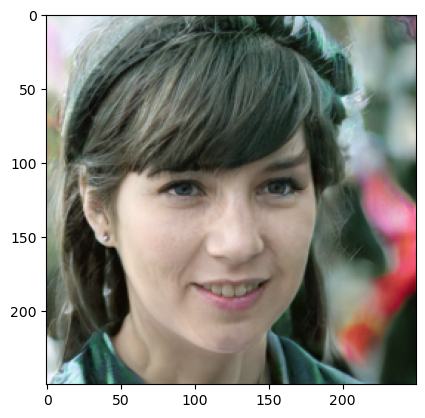

1/1 [==============================] - 0s 23ms/step
Face


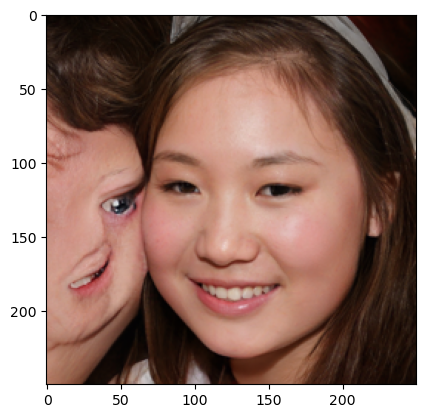

1/1 [==============================] - 0s 24ms/step
Face


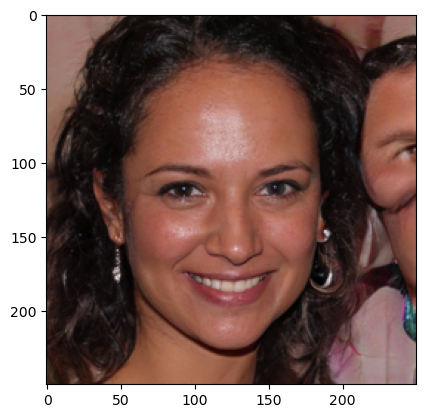

1/1 [==============================] - 0s 24ms/step
Face


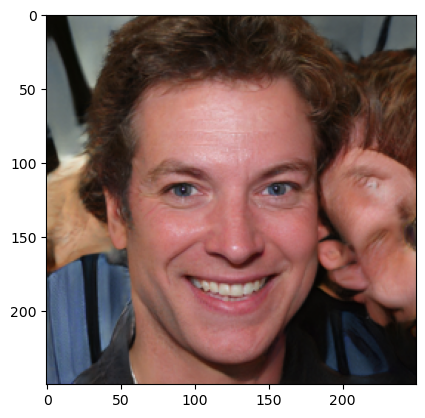

1/1 [==============================] - 0s 23ms/step
Face


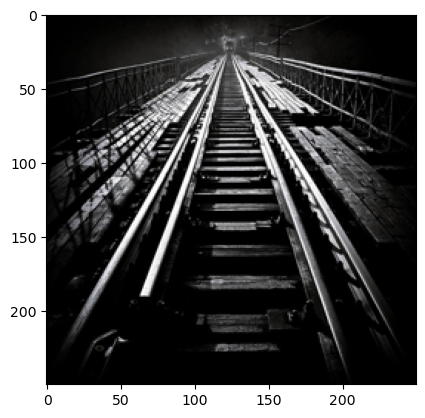

1/1 [==============================] - 0s 23ms/step
Not Face


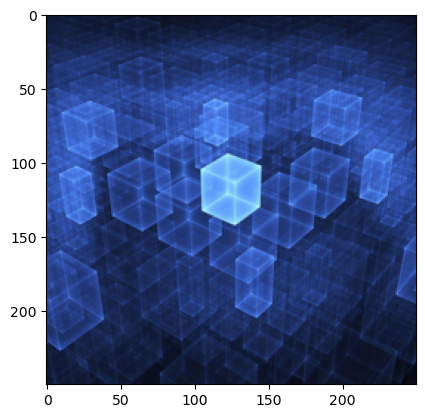

1/1 [==============================] - 0s 24ms/step
Not Face


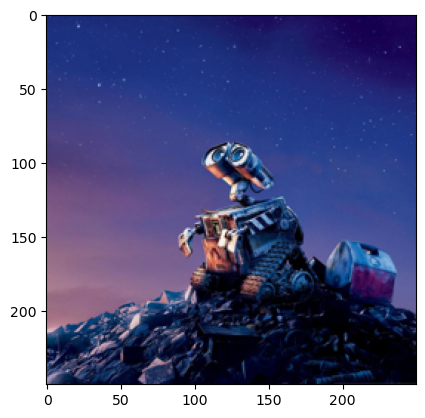

1/1 [==============================] - 0s 24ms/step
Not Face


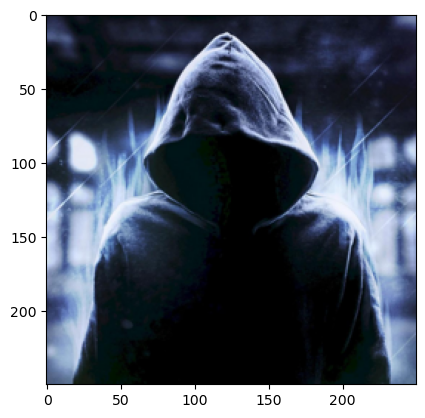

1/1 [==============================] - 0s 23ms/step
Not Face


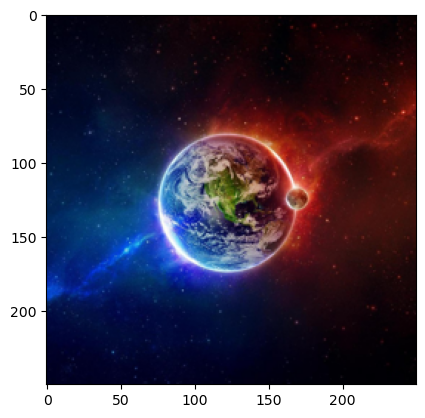

1/1 [==============================] - 0s 22ms/step
Not Face


In [6]:
test_set = 'data/testing' # testing set
# For loop to go through the testing directory check for different classes and to try and predict what class the given image is
for class_folder in os.listdir(test_set):
    class_path = os.path.join(test_set, class_folder)
    
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        img = image.load_img(img_path)
        img = img.resize((250, 250))
        
        plt.imshow(img)
        plt.show()
        
        X = image.img_to_array(img)
        X = np.expand_dims(X, axis=0)
        
        val = model.predict(X)
        if val == 0:
            print("Face")
        else:
            print("Not Face")